<div style="text-align: center; color: Pink; font-family: Arial;">
    <h2> Implementation Of K_Means Algorithm </h2>
</div>



- ### K-Means is a popular clustering algorithm used in data science and machine learning. It partitions the data into K clusters, where each data point belongs to the cluster with the nearest mean. The algorithm iteratively refines the cluster centroids to minimize the within-cluster variance.



### Steps of K-Means Algorithm:
1. **Initialization**: Select K initial centroids randomly from the dataset.
2. **Assignment**: Assign each data point to the nearest centroid, forming K clusters.
3. **Update**: Calculate the new centroids as the mean of the data points in each cluster.
4. **Repeat**: Repeat the assignment and update steps until the centroids no longer change or the maximum number of iterations is reached.



### Applications of K-Means:
- Customer segmentation
- Image compression
- Anomaly detection
- Document clustering

# `01` Imports

In [196]:
import numpy as np 
import matplotlib.pyplot as plt


%matplotlib inline

## `02` Functions

In [197]:
# plot the boundaries
def kmeans_bounderies_visualization(X, centroids, labels):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

    Z = np.argmin(np.linalg.norm(np.c_[xx.ravel(), yy.ravel()][:, None] - centroids, axis=2), axis=1)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.2)

    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title('K-means++')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100, marker='x')

In [198]:
# K_means Implementation
def k_means(X, k, max_iter=100):
    n, d = X.shape
    # Randomly initialize the centroids
    centroids = X[np.random.choice(n, k, replace=False)]

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids


    return centroids, labels, distances


In [199]:
def plot_2D(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Data')


In [212]:
def random_data(num_of_features, num_of_samples):
    
    clusters = []
    for i in range(num_of_features):
        x = np.random.randn(num_of_samples // num_of_features, num_of_features) * 1.2 + np.random.randint(1, 20, num_of_features)
        clusters.append(x)

    X = np.vstack(clusters)
    return X


In [213]:
# plot the distances
def plot_distances(X, distances, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=distances.min(axis=1))
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r')
    plt.title('Distances')

In [264]:
def plot_clusters(X, labels, centroids):
    for i in range(k):
        plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], label=f'Cluster {i}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100, marker='x')
    plt.legend()
    plt.title('K-means')
    plt.show()



In [215]:
def plot_decision_boundaries_circles(X, centroids, k):
    plt.figure(figsize=(8, 8))
    labels = np.argmin(np.linalg.norm(X[:, None] - centroids, axis=2), axis=1)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.title('K-means')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100, marker='x')
    # Plot the decision boundaries circles around the clusters
    for i in range(k):
        plt.gca().add_artist(plt.Circle(centroids[i], np.linalg.norm(X[labels == i] - centroids[i], axis=1).max(), color='r', fill=False))


In [216]:
X = random_data(num_of_features= 4, num_of_samples=150)


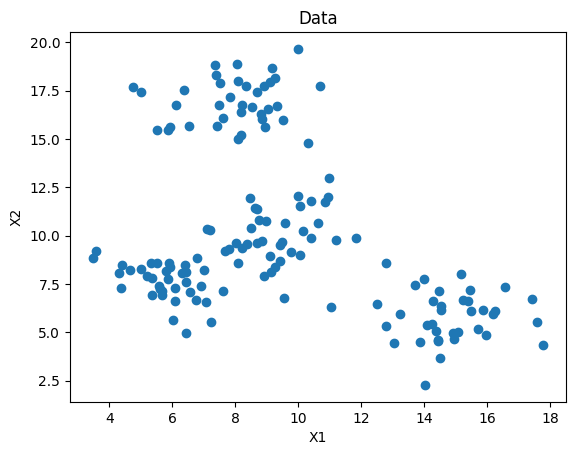

In [217]:
plot_2D(X)

### Run K-means


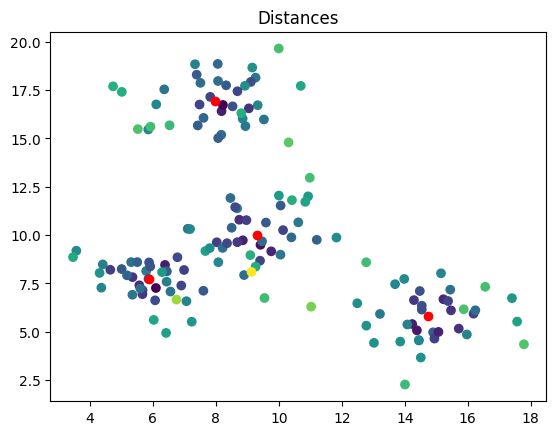

In [252]:
k = 4
centroids, labels, distances = k_means(X, k)
# plot the distances
plot_distances(X, distances, centroids)

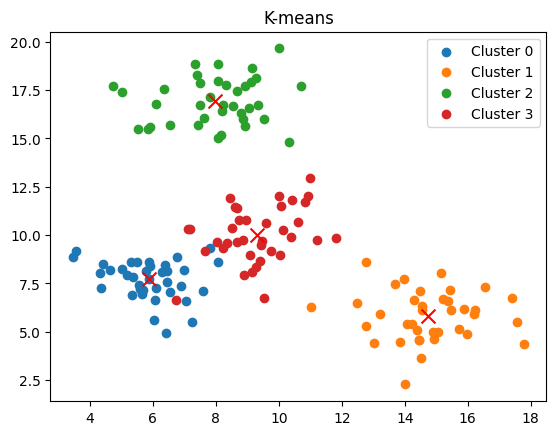

In [265]:
# plot the clusters
plot_clusters(X, labels, centroids)

Text(0.5, 1.0, 'Elbow plot')

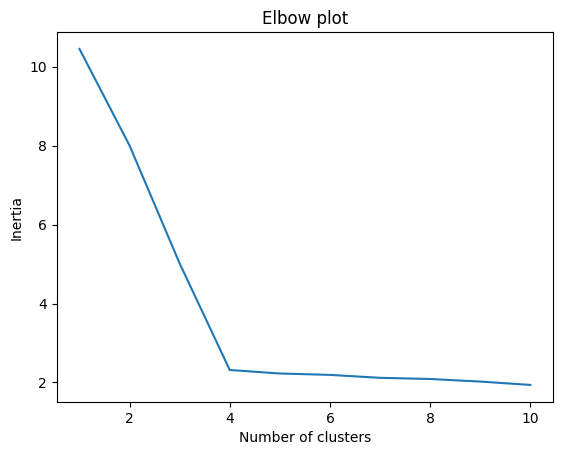

In [266]:
# draw the elbow plot
inertia = []

for cluster in range(1, 11):
    centroids_, labels_, distances_ = k_means(X, cluster)
    inertia.append(np.sum(np.min(distances_, axis=1)) / X.shape[0])

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')

plt.ylabel('Inertia')
plt.title('Elbow plot')


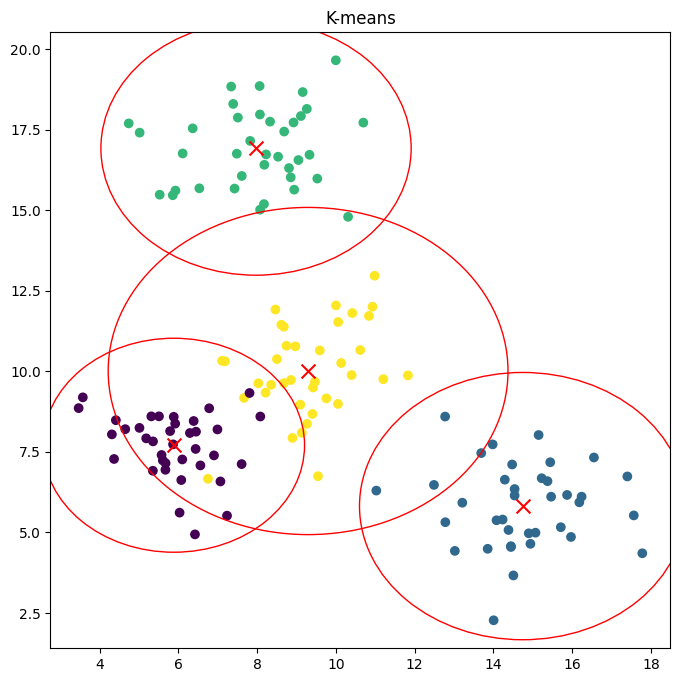

In [267]:
plot_decision_boundaries_circles(X, centroids, k)

# K_means_++


### `K-means++ :`
- is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm. 
- the difference between k-means and k-means++ is the way the initial centroids are chosen.
- In k-means, the initial centroids are chosen randomly from the data points.
- In k-means++, the initial centroids are chosen based on the distance between the data points.

### ` The algorithm works as follows: `
1. Choose the first centroid randomly from the data points.
2. For each data point, calculate the distance between the data point and the nearest centroid.
3. Calculate the probability of choosing each data point as the next centroid based on the distance.
4. Choose the next centroid randomly based on the probability.
5. Repeat steps 2-4 until k centroids are chosen.


In [268]:
def k_means_plus_plus(X, k, max_iter=100):

    n, d = X.shape
    # Randomly initialize the first centroid
    centroids = [X[np.random.choice(n)]]

    for _ in range(1, k):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        min_distances = np.min(distances, axis=1)
        probs = min_distances / np.sum(min_distances)

        centroids.append(X[np.random.choice(n, p=probs)])

    centroids = np.array(centroids)

    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return centroids, labels, distances



In [277]:
# Run K-means++
k = 4
centroids, labels, distances = k_means_plus_plus(X, k)


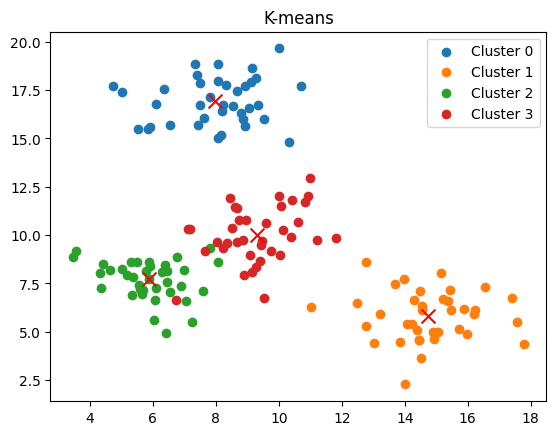

In [278]:
plot_clusters(X, labels, centroids)


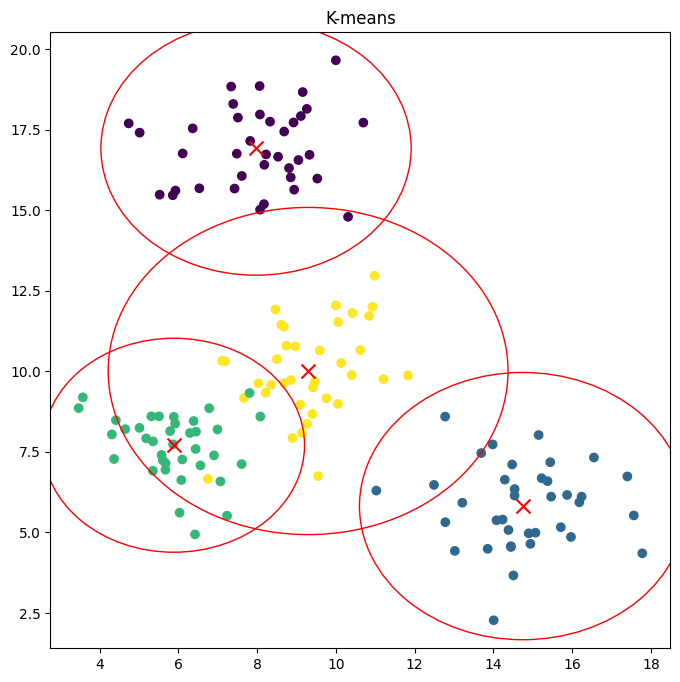

In [280]:
plot_decision_boundaries_circles(X, centroids, k)

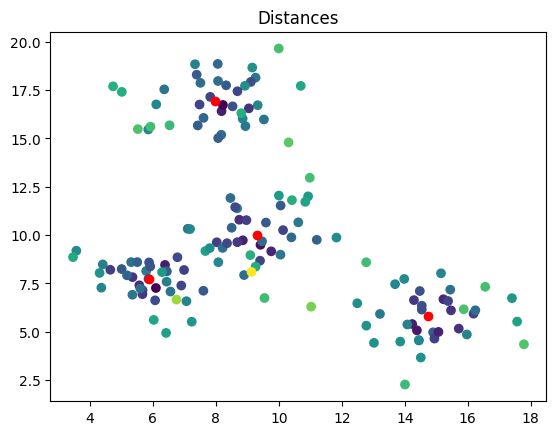

In [286]:
plot_distances(X, distances, centroids)

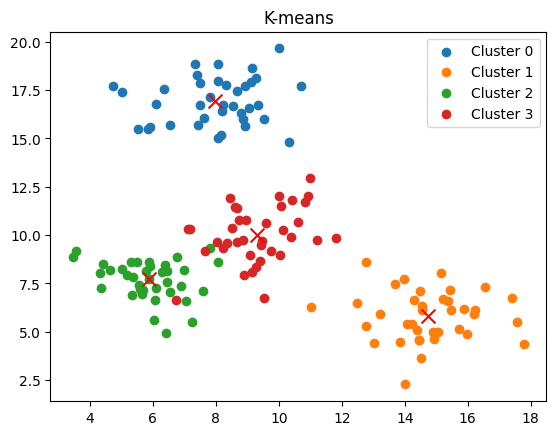

In [288]:
kmeans_bounderies_visualization(X, centroids, labels)

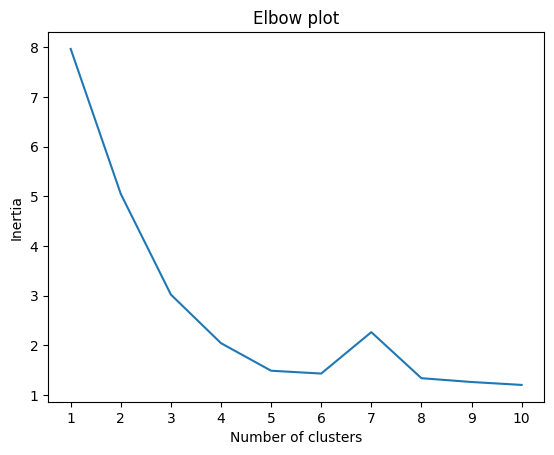

In [65]:
# draw the elbow plot
inertia = []

for k in range(1, 11):

    centroids, labels, distances = k_means_plus_plus(X, k)
    inertia.append(np.sum(np.min(distances, axis=1)) / X.shape[0])

plt.plot(range(1, 11), inertia)
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow plot')
plt.show()

from the plot we can check k = 3

## K_means_++ is better in the initalization of the centroids